In [1]:
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#define problem
problem = mlrose_hiive.QueensGenerator.generate(seed=42, size=32)

In [3]:
#run randomized optimization algorithm
rhc = mlrose_hiive.RHCRunner(problem=problem,
                    experiment_name="RHC_Queens",
                    output_directory="out",
                    seed=42,
                    iteration_list=2 ** np.arange(13),
                    max_attempts=500,
                    restart_list=[100])
df_run_stats_rhc, df_run_curves_rhc = rhc.run()

In [4]:
# run simulated annealing optimization algorithm
sa = mlrose_hiive.SARunner(problem=problem,
                  experiment_name="SA_Queens",
                  output_directory="out",
                  seed=42,
                  iteration_list=2 ** np.arange(13),
                  max_attempts=500,
                  temperature_list=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100],
                  decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay])
# the two data frames will contain the results
df_run_stats_sa, df_run_curves_sa = sa.run()

In [5]:
#run genetic algorithm optimization algorithm
ga = mlrose_hiive.GARunner(problem=problem,
                  experiment_name="GA_Queens",
                  output_directory="out",
                  seed=42,
                  iteration_list=2 ** np.arange(13),
                  max_attempts=200,
                  population_sizes=[200, 500, 1000, 2000, 3000, 4000],
                  mutation_rates=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# the two data frames will contain the results
df_run_stats_ga, df_run_curves_ga = ga.run() 

In [6]:
#run mimic optimization algorithm
mmc = mlrose_hiive.MIMICRunner(problem=problem,
                      experiment_name="MMC_Queens",
                      output_directory="out",
                      seed=42,
                      iteration_list=2 ** np.arange(13),
                      max_attempts=200,
                      keep_percent_list=[0.25, 0.5, 0.75],
                      population_sizes = [1000, 2000, 3000, 4000, 5000, 6000, 8000, 10000], use_fast_mimic=True)

# the two data frames will contain the results
df_run_stats_mmc, df_run_curves_mmc = mmc.run()

In [7]:
df_run_curves_rhc.head

<bound method NDFrame.head of         Iteration      Time  Fitness    FEvals  Restarts  max_iters  \
0               0  0.005032     29.0       0.0       100       4096   
1               1  0.035465     29.0       1.0       100       4096   
2               2  0.048833     29.0       2.0       100       4096   
3               3  0.062161     29.0       3.0       100       4096   
4               4  0.063264     29.0       4.0       100       4096   
...           ...       ...      ...       ...       ...        ...   
120955        892  2.151879      5.0  123191.0       100       4096   
120956        893  2.155929      5.0  123192.0       100       4096   
120957        894  2.159802      5.0  123193.0       100       4096   
120958        895  2.163671      5.0  123194.0       100       4096   
120959        896  2.167565      5.0  123195.0       100       4096   

        current_restart  
0                     0  
1                     0  
2                     0  
3            

Text(0, 0.5, 'Fitness')

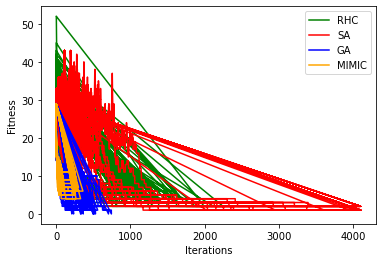

In [8]:
# Plot Iterations vs Fitness
plt.plot(df_run_curves_rhc['Iteration'], df_run_curves_rhc['Fitness'], label='RHC', color='green')
plt.plot(df_run_curves_sa['Iteration'], df_run_curves_sa['Fitness'], label='SA', color='red')
plt.plot(df_run_curves_ga['Iteration'], df_run_curves_ga['Fitness'], label='GA', color='blue')
plt.plot(df_run_curves_mmc['Iteration'], df_run_curves_mmc['Fitness'], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")

In [9]:
# Plot Iterations vs Fitness
df_stats_rhc_best = df_run_stats_rhc.loc[(df_run_stats_rhc['Restarts']==100) & (df_run_stats_rhc['current_restart']==11)]
df_stats_sa_best = df_run_stats_sa.loc[(df_run_stats_sa['schedule_type']=='geometric') & (df_run_stats_sa['schedule_init_temp']==6)]
df_stats_ga_best = df_run_stats_ga.loc[(df_run_stats_ga['Population Size']==200) & (df_run_stats_ga['Mutation Rate']==0.6)]
df_stats_mmc_best = df_run_stats_mmc.loc[(df_run_stats_mmc['Population Size']==8000) & (df_run_stats_mmc['Keep Percent']==0.75)]

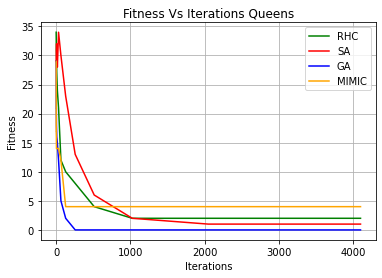

In [10]:
plt.plot(df_stats_rhc_best['Iteration'], df_stats_rhc_best['Fitness'], label='RHC', color='green')
plt.plot(df_stats_sa_best['Iteration'], df_stats_sa_best['Fitness'], label='SA', color='red')
plt.plot(df_stats_ga_best['Iteration'], df_stats_ga_best['Fitness'], label='GA', color='blue')
plt.plot(df_stats_mmc_best['Iteration'], df_stats_mmc_best['Fitness'], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.grid()
plt.title("Fitness Vs Iterations Queens")
plt.savefig("Fitness Vs Iterations Queens")

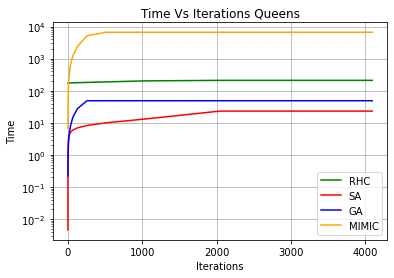

In [11]:
plt.plot(df_stats_rhc_best['Iteration'], df_stats_rhc_best['Time'], label='RHC', color='green')
plt.plot(df_stats_sa_best['Iteration'], df_stats_sa_best['Time'], label='SA', color='red')
plt.plot(df_stats_ga_best['Iteration'], df_stats_ga_best['Time'], label='GA', color='blue')
plt.plot(df_stats_mmc_best['Iteration'], df_stats_mmc_best['Time'], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Time")
plt.yscale('log')
plt.grid()
plt.title("Time Vs Iterations Queens")
plt.savefig("Time Vs Iterations Queens")

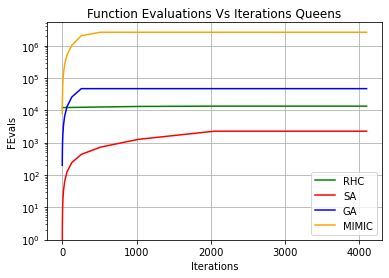

In [12]:
plt.plot(df_stats_rhc_best['Iteration'], df_stats_rhc_best['FEvals'], label='RHC', color='green')
plt.plot(df_stats_sa_best['Iteration'], df_stats_sa_best['FEvals'], label='SA', color='red')
plt.plot(df_stats_ga_best['Iteration'], df_stats_ga_best['FEvals'], label='GA', color='blue')
plt.plot(df_stats_mmc_best['Iteration'], df_stats_mmc_best['FEvals'], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("FEvals")
plt.yscale('log')
plt.grid()
plt.title("Function Evaluations Vs Iterations Queens")
plt.savefig("Function Evaluations Vs Iterations Queens")

In [14]:
#define problem
problem1 = mlrose_hiive.QueensGenerator.generate(seed=42, size=4)
problem2 = mlrose_hiive.QueensGenerator.generate(seed=42, size=8)
problem3 = mlrose_hiive.QueensGenerator.generate(seed=42, size=16)
problem4 = mlrose_hiive.QueensGenerator.generate(seed=42, size=32)
problem5 = mlrose_hiive.QueensGenerator.generate(seed=42, size=64)

In [15]:
#run randomized optimization algorithm
rhc1 = mlrose_hiive.RHCRunner(problem=problem1,
                    experiment_name="RHC1_Queens",
                    output_directory="out",
                    seed=42,
                    iteration_list=[4096],
                    max_attempts=500,
                    restart_list=[12])
df_run_stats_rhc1, df_run_curves_rhc1 = rhc1.run()

rhc2 = mlrose_hiive.RHCRunner(problem=problem2,
                    experiment_name="RHC2_Queens",
                    output_directory="out",
                    seed=42,
                    iteration_list=[4096],
                    max_attempts=500,
                    restart_list=[12])
df_run_stats_rhc2, df_run_curves_rhc2 = rhc2.run()

rhc3 = mlrose_hiive.RHCRunner(problem=problem3,
                    experiment_name="RHC3_Queens",
                    output_directory="out",
                    seed=42,
                    iteration_list=[4096],
                    max_attempts=500,
                    restart_list=[12])
df_run_stats_rhc3, df_run_curves_rhc3 = rhc3.run()

rhc4 = mlrose_hiive.RHCRunner(problem=problem4,
                    experiment_name="RHC4_Queens",
                    output_directory="out",
                    seed=42,
                    iteration_list=[4096],
                    max_attempts=500,
                    restart_list=[12])
df_run_stats_rhc4, df_run_curves_rhc4 = rhc4.run()

rhc5 = mlrose_hiive.RHCRunner(problem=problem5,
                    experiment_name="RHC5_Queens",
                    output_directory="out",
                    seed=42,
                    iteration_list=[4096],
                    max_attempts=500,
                    restart_list=[12])
df_run_stats_rhc5, df_run_curves_rhc5 = rhc5.run()

In [16]:
# run simulated annealing optimization algorithm
sa1 = mlrose_hiive.SARunner(problem=problem1,
                  experiment_name="SA1_Queens",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=500,
                  temperature_list=[6],
                  decay_list=[mlrose_hiive.GeomDecay])
# the two data frames will contain the results
df_run_stats_sa1, df_run_curves_sa1 = sa1.run()

sa2 = mlrose_hiive.SARunner(problem=problem2,
                  experiment_name="SA2_Queens",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=500,
                  temperature_list=[6],
                  decay_list=[mlrose_hiive.GeomDecay])
# the two data frames will contain the results
df_run_stats_sa2, df_run_curves_sa2 = sa2.run()

sa3 = mlrose_hiive.SARunner(problem=problem3,
                  experiment_name="SA3_Queens",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=500,
                  temperature_list=[6],
                  decay_list=[mlrose_hiive.GeomDecay])
# the two data frames will contain the results
df_run_stats_sa3, df_run_curves_sa3 = sa3.run()

sa4 = mlrose_hiive.SARunner(problem=problem4,
                  experiment_name="SA4_Queens",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=500,
                  temperature_list=[6],
                  decay_list=[mlrose_hiive.GeomDecay])
# the two data frames will contain the results
df_run_stats_sa4, df_run_curves_sa4 = sa4.run()

sa5 = mlrose_hiive.SARunner(problem=problem5,
                  experiment_name="SA5_Queens",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=500,
                  temperature_list=[6],
                  decay_list=[mlrose_hiive.GeomDecay])
# the two data frames will contain the results
df_run_stats_sa5, df_run_curves_sa5 = sa5.run()

In [17]:
#run genetic algorithm optimization algorithm
ga1 = mlrose_hiive.GARunner(problem=problem1,
                  experiment_name="GA1_Queens",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=200,
                  population_sizes=[200],
                  mutation_rates=[0.6])

# the two data frames will contain the results
df_run_stats_ga1, df_run_curves_ga1 = ga1.run() 

ga2 = mlrose_hiive.GARunner(problem=problem2,
                  experiment_name="GA2_Queens",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=200,
                  population_sizes=[200],
                  mutation_rates=[0.6])

# the two data frames will contain the results
df_run_stats_ga2, df_run_curves_ga2 = ga2.run() 

ga3 = mlrose_hiive.GARunner(problem=problem3,
                  experiment_name="GA3_Queens",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=200,
                  population_sizes=[200],
                  mutation_rates=[0.6])

# the two data frames will contain the results
df_run_stats_ga3, df_run_curves_ga3 = ga3.run() 

ga4 = mlrose_hiive.GARunner(problem=problem4,
                  experiment_name="GA4_Queens",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=200,
                  population_sizes=[200],
                  mutation_rates=[0.6])

# the two data frames will contain the results
df_run_stats_ga4, df_run_curves_ga4 = ga4.run() 

ga5 = mlrose_hiive.GARunner(problem=problem5,
                  experiment_name="GA5_Queens",
                  output_directory="out",
                  seed=42,
                  iteration_list=[4096],
                  max_attempts=200,
                  population_sizes=[200],
                  mutation_rates=[0.6])

# the two data frames will contain the results
df_run_stats_ga5, df_run_curves_ga5 = ga5.run() 

In [ ]:
#run mimic optimization algorithm
mmc1 = mlrose_hiive.MIMICRunner(problem=problem1,
                      experiment_name="MMC1_Queens",
                      output_directory="out",
                      seed=42,
                      iteration_list=[4096],
                      max_attempts=200,
                      keep_percent_list=[0.75],
                      population_sizes = [8000], use_fast_mimic=True)

# the two data frames will contain the results
df_run_stats_mmc1, df_run_curves_mmc1 = mmc1.run()

mmc2 = mlrose_hiive.MIMICRunner(problem=problem2,
                      experiment_name="MMC2_Queens",
                      output_directory="out",
                      seed=42,
                      iteration_list=[4096],
                      max_attempts=200,
                      keep_percent_list=[0.75],
                      population_sizes = [8000], use_fast_mimic=True)

# the two data frames will contain the results
df_run_stats_mmc2, df_run_curves_mmc2 = mmc2.run()ii

mmc3 = mlrose_hiive.MIMICRunner(problem=problem3,
                      experiment_name="MMC3_Queens",
                      output_directory="out",
                      seed=42,
                      iteration_list=[4096],
                      max_attempts=200,
                      keep_percent_list=[0.75],
                      population_sizes = [8000], use_fast_mimic=True)

# the two data frames will contain the results
df_run_stats_mmc3, df_run_curves_mmc3 = mmc3.run()

mmc4 = mlrose_hiive.MIMICRunner(problem=problem4,
                      experiment_name="MMC4_Queens",
                      output_directory="out",
                      seed=42,
                      iteration_list=[4096],
                      max_attempts=200,
                      keep_percent_list=[0.75],
                      population_sizes = [8000], use_fast_mimic=True)

# the two data frames will contain the results
df_run_stats_mmc4, df_run_curves_mmc4 = mmc4.run()

mmc5 = mlrose_hiive.MIMICRunner(problem=problem5,
                      experiment_name="MMC5_Queens",
                      output_directory="out",
                      seed=42,
                      iteration_list=[4096],
                      max_attempts=200,
                      keep_percent_list=[0.75],
                      population_sizes = [8000], use_fast_mimic=True)

# the two data frames will contain the results
df_run_stats_mmc5, df_run_curves_mmc5 = mmc5.run()

In [ ]:
data_rhc = [{'Problem Size': 4, 'Fitness': df_run_stats_rhc1['Fitness'].max()},
           {'Problem Size': 8, 'Fitness': df_run_stats_rhc2['Fitness'].max()},
           {'Problem Size': 16, 'Fitness': df_run_stats_rhc3['Fitness'].max()},
           {'Problem Size': 32, 'Fitness': df_run_stats_rhc4['Fitness'].max()},
           {'Problem Size': 64, 'Fitness': df_run_stats_rhc5['Fitness'].max()}]
df_rhc = pd.DataFrame(data_rhc)

In [ ]:
data_sa = [{'Problem Size': 4, 'Fitness': df_run_stats_sa1['Fitness'].max()},
           {'Problem Size': 8, 'Fitness': df_run_stats_sa2['Fitness'].max()},
           {'Problem Size': 16, 'Fitness': df_run_stats_sa3['Fitness'].max()},
           {'Problem Size': 32, 'Fitness': df_run_stats_sa4['Fitness'].max()},
           {'Problem Size': 64, 'Fitness': df_run_stats_sa5['Fitness'].max()}]
df_sa = pd.DataFrame(data_sa)

In [ ]:
data_ga = [{'Problem Size': 4, 'Fitness': df_run_stats_ga1['Fitness'].max()},
           {'Problem Size': 8, 'Fitness': df_run_stats_ga2['Fitness'].max()},
           {'Problem Size': 16, 'Fitness': df_run_stats_ga3['Fitness'].max()},
           {'Problem Size': 32, 'Fitness': df_run_stats_ga4['Fitness'].max()},
           {'Problem Size': 64, 'Fitness': df_run_stats_ga5['Fitness'].max()}]
df_ga = pd.DataFrame(data_ga)

In [ ]:
data_mmc = [{'Problem Size': 4, 'Fitness': df_run_stats_mmc1['Fitness'].max()},
           {'Problem Size': 8, 'Fitness': df_run_stats_mmc2['Fitness'].max()},
           {'Problem Size': 16, 'Fitness': df_run_stats_mmc3['Fitness'].max()},
           {'Problem Size': 32, 'Fitness': df_run_stats_mmc4['Fitness'].max()},
           {'Problem Size': 64, 'Fitness': df_run_stats_mmc5['Fitness'].max()}]
df_mmc = pd.DataFrame(data_mmc)

In [ ]:
plt.plot(df_rhc['Problem Size'], df_rhc['Fitness'], label='RHC', color='green')
plt.plot(df_sa['Problem Size'], df_sa['Fitness'], label='SA', color='red')
plt.plot(df_ga['Problem Size'], df_ga['Fitness'], label='GA', color='blue')
plt.plot(df_mmc['Problem Size'], df_mmc['Fitness'], label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Problem Size")
plt.ylabel("Fitness")
plt.grid()
plt.title("Fitness vs Problem Size Queens")
plt.savefig("Fitness vs Problem Size Queens")